#Everettian Impact demo for Traders

###In the following notebook we will showcase a small demo of the use case for our market impact analysis from the eyes of a trader.

###I want to unload 10,000 shares in the next Half Hour and want to know the answer to the question:

###What will be my expected impact on the price when carrying out this action over that timeframe ?

###Then as a trader I can intelligently choose precisely when and how I want to carry out my trade.

In [1]:
from market_impact import get_data
from market_impact import calculate_impact
from market_impact import get_trade

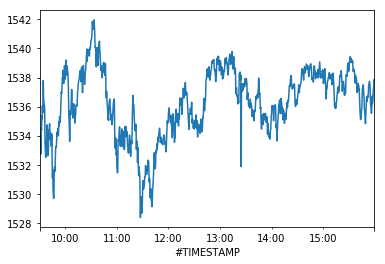

In [2]:
# Let's take a sample day in which we'd like to trade 
# Aggregated to our interval length of interest

%matplotlib inline

day_data = get_data('20180306', '30M')
day_data['PRICE'].plot()

In [3]:
#Now as a trader Let's suppose it's 3pm and I want to know how hard I will hit the market
impact_estimate = calculate_impact(day_data, '2018-03-06 09:32:11.490041610', 10000)
impact_estimate

0.20000966453535693

# Now I know that I can expect to lose roughly 0.2% from impact cost
As an experienced trader I can now either bide my time to wait for better impact numbers or act on this now
Constantly monitoring how this impact estimate fluctuates throughout the day will allow me to make the right call

In [4]:
# Now for a quick benchmark lets look at how our code does against a trade that ACTUALLY took place on the day
# Randomly picking the 5000th trade on the day
sample_trade = get_trade(day_data, 5000)
sample_trade

#TIMESTAMP        2018-03-06 09:33:18.857820104
PRICE                                   1535.79
SIZE                                          3
EXCHANGE                                      D
BUY_SELL_FLAG                               NaN
TRADE_TYPE                                  NaN
COND                                       @  I
TRF                                           Q
SOURCE                                        N
COND_CODE                                   NaN
TRADE_COND                                  NaN
TRADE_PROPERTY                              NaN
SYMBOL_NAME                      NYSE_TAQ::AMZN
Name: 2018-03-06 09:33:18.857820104, dtype: object

In [23]:

volume_in_period = int(day_data[day_data.index > sample_trade['#TIMESTAMP']].ix[0, 'OBV'] - \
                   day_data[day_data.index <= sample_trade['#TIMESTAMP']].ix[-1, 'OBV'])

# There we're this many shares traded in the same time block as the trade we are interested in
print 'Volume in time window:', volume_in_period


# given that there we're 2261 shares traded in that window we can expect that our trade of 3 shares will have
# roughly proportional impact

impact_proportion = float(sample_trade['SIZE']) / float(volume_in_period)

print 'We should expect our trade to have this proportion of total impact for the period', impact_proportion

Volume in time window: 2261
We should expect our trade to have this proportion of total impact for the period 0.00132684652808


In [48]:

#Impact for our singular trade
small_impact = calculate_impact(day_data, sample_trade['#TIMESTAMP'], sample_trade['SIZE'])


#Impact of all trades in the window it lies in.
full_window_impact = calculate_impact(day_data,
                                      day_data[day_data.index > sample_trade['#TIMESTAMP']].index[0],
                                      volume_in_period)


print 'Our sample trade has this much impact on price change', small_impact
print 'Our Overall impact from the window our trade falls in to', full_window_impact


Our sample trade has this much impact on price change 6.96645353569e-05
Our Overall impact from the window our trade falls in to 0.0452296645354


# We can now sanity check our work by extrapolating the small trade


In [37]:
ratio_of_impact = small_impact * (volume_in_period / sample_trade['SIZE'])

# We want the impact of our small trade extrapolated up to roughly be equal to the impact of the larger window

print 'We extrapolate to:', ratio_of_impact, ' As compared to the true impact in the window:', full_window_impact

We extrapolate to: 0.0524573951238  As compared to the true impact in the window: 0.0452296645354


# We are only off by 0.01% , a very good result